# **GROUP 7** Oktay, Nara, Luis
# <span style="color:#AA00FF"> Towards a FIFA metaverse </span>.
**<span style="color:#AA00FF">Pricing the future avatars of FIFAverse based on value and performance data of the players</span>.**



## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
pd.set_option('display.max_columns', None) # displays all columns in dfs
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.preprocessing import Normalizer #SKlearn is the library for machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import plotly.express as px

## Function and Results

# 01 Data import, Features name cleaning and first exploration
<div class="alert alert-block alert-info">
<b>info:</b> Here a function is defined. 
    The data is cleaned and prepared for a first analysis and then clean again until the complete function was built
</div>

In [2]:
#Function to clean the data
def DATA_FRAME_CLEAN(data_frame_input):
    #Print size of dataframe
    print('The size for this data frame is: ', data_frame_input.shape)
    
    #Standarize column names
    cols = [col_name.upper().replace(' ', '_') for col_name in data_frame_input.columns]
    data_frame_input.columns = cols
    
    #Clean Variables
    #Fix weigth
    data_frame_input['WEIGHT'] = data_frame_input['WEIGHT'].str.rstrip('lbs').astype(int)
    #Fix heigth
    data_frame_input['HEIGHT'] = data_frame_input['HEIGHT'].str.replace('\'', '.').str.replace('"', '').astype(float)
    
    data_frame_input['IR'] = data_frame_input['IR'].str.replace('★', '').astype(float)
    data_frame_input['W/F'] = data_frame_input['W/F'].str.replace('★', '').astype(float)
    data_frame_input['SM'] = data_frame_input['SM'].str.replace('★', '').astype(float)
    
    #Fix Money related variables
    ## multiply the numeric values by 1 million or 1 thousand, depending on whether the value represents millions or thousands of euros
    data_frame_input["VALUE"] = data_frame_input["VALUE"].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)
   
    #WAGE
    data_frame_input["WAGE"] = data_frame_input["WAGE"].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)
  
    
    #RELEASE_CLAUSE
    data_frame_input["RELEASE_CLAUSE"] = data_frame_input["RELEASE_CLAUSE"].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)

    
    #Fixed values with a + as a , separator
    cols_to_replace = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','GK']
    #Some values contains a -
    #data_frame_input[cols_to_replace] = data_frame_input[cols_to_replace].str.replace('-'', '').str.replace('"', '')
    data_frame_input[cols_to_replace] = data_frame_input[cols_to_replace].apply(lambda x: x.str.replace('+', '.'))

    #Convert HITS to numeric
    # Remove the "K" character and convert to numeric
    data_frame_input['HITS'] = pd.to_numeric(data_frame_input['HITS'].str.replace('K', '', regex=False)) * 1000
    data_frame_input['HITS'] = pd.to_numeric(data_frame_input['HITS'])
    
    #Convert ID to string
    data_frame_input['ID'] = data_frame_input['ID'].astype(str)
    
    #Clean nulls
    #Select numeric columns
    df_numeric=data_frame_input.select_dtypes(include=["float", "int"]) 
    null_columns = df_numeric.columns[df_numeric.isna().sum() != 0].tolist()
    print("\n\n\nNumerical columns that contains null values: \n ",null_columns,"\n\n\n")
    #Put 0 in those which have nulls.
    #for  Column_to_change in null_columns:
        #df_numeric[Column_to_change] = df_numeric[Column_to_change].fillna(0) 
    
    #Select Object Variables
    df_object=data_frame_input.select_dtypes(include=[object]) 
    null_columns = df_object.columns[df_object.isna().sum() != 0].tolist()
    print("Categorical columns that contains null values: \n ",null_columns, "\n nulls have been replaced with Unkown label\n\n\n")
    #Put Unkwon in those which have nulls.
    for  Column_to_change in null_columns:
        df_object[Column_to_change] = df_object[Column_to_change].fillna('Unknown') 
    
    #Merge both branches
    data_frame_input=pd.concat([df_numeric,df_object],axis=1)
    #print(data_frame_input.columns)
    
    #Change EFFECTIVE_TO_DATE to date type
    #data_frame_input['EFFECTIVE_TO_DATE'] = pd.to_datetime(data_frame_input['EFFECTIVE_TO_DATE'])
    
    #Rename columns
    data_frame_input = data_frame_input.rename(columns={'OVA': 'OVERALL', 'BOV': 'BEST_OVERALL','LS': 'LEFT_STRIKER','ST':'LEFT_STRIKER',
                           'RS':'RIGHT_STRIKER','LW':'LEFT_WING','LF':'LEFT_FORWARD','CF':'CENTRAL_FORWARD','RF':'RIGHT_FORWARD',
                            'RW':'RIGHT_WING','LAM':'LEFT_ATTACKING_MIDFIELDER','CAM':'CENTRAL_ATTACKING_MIDFILEDER','RAM':'RIGHT_ATTACKING_MIDFIELDER',
                           'LM':'LEFT_MIDFIELDER','LCM':'LEFT_CENTRAL_MIDFIELDER','CM':'CENTRAL_MIDFIELDER','RCM':'RIGHT_CENTRAL_MIDFIELDER','RM':'RIGHT_MIDFIELDER',
                           'LWB':'LEFT_WING_BACK','LDM':'LEFT_DEFFENSIVE_MIDFIELDER','CDM':'CENTRAL_DEFENSIVE_MIDFIELDER','RDM':'RIGHT_DEFENSIVE_MIDFIELDER',
                           'RWB':'RIGHT_WING_BACK','LB':'LEFT_BACK','LCB':'LEFT_CENTRAL_BACK','CB':'CENTRAL_BACK','RCB':'RIGHT_CENTRAL_BACK','RB':'RIGHT_BACK',
                           'GK':'GOAL_KEEPER','BP':'BEST_POSITION','FK_ACCURACY':'FREE_KICK_ACCURACY','A/W':'ATTACKING_WORK_RATE','D/W':'DEFENSIVE_WORK_RATE','SM':'SKILL_MOVES','W/F':'WEEK_FOOT_ABILITY','SHO':'SHOOTING',
                           'POT':'POTENTIAL'})
    
    #Assign to ouput
    data_frame_output=data_frame_input
    
    #Print info for the dataframe
    print('\n\n\nDescription of output data frame \n')
    data_frame_output.info(
    )
    return data_frame_output

Import the data and apply the function

In [3]:
#Here I use the function created to import, clean and show information about this dataframe
data_frame_input = pd.read_csv('./fifa21_male2.csv')
#data_frame_input.shape
df_cleaned=DATA_FRAME_CLEAN(data_frame_input)
df_cleaned.sample(10)

The size for this data frame is:  (17125, 107)



Numerical columns that contains null values: 
  ['VOLLEYS', 'CURVE', 'AGILITY', 'BALANCE', 'JUMPING', 'INTERCEPTIONS', 'POSITIONING', 'VISION', 'COMPOSURE', 'SLIDING_TACKLE', 'HITS'] 



Categorical columns that contains null values: 
  ['CLUB', 'POSITION', 'CLUB_LOGO', 'JOINED', 'LOAN_DATE_END', 'A/W', 'D/W'] 
 nulls have been replaced with Unkown label






Description of output data frame 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, AGE to GENDER
dtypes: float64(15), int32(4), int64(44), object(44)
memory usage: 13.7+ MB


AGE  OVERALL  BEST_OVERALL  POTENTIAL  HEIGHT  WEIGHT  GROWTH    VALUE  \
13815   17       61            60         80     6.3     176      19   500000   
6754    27       73            73         73     5.9     154       0  4200000   
14076   20       63            66         75     5.9     154      12   650000   
941     28       71            71         70     6.2     190      -1        0   
2625    26       70            71         71     6.2     181       1  2100000   
419     34       61            61         61     6.3     183       0   110000   
6580    24       63            64         64     5.9     161       1   450000   
12659   20       60            59         70     6.0     170      10   325000   
8286    24       65            67         69     6.3     194       4   625000   
9395    25       69            71         74     6.1     161       5  1400000   

       WAGE  RELEASE_CLAUSE  ATTACKING  CROSSING  FINISHING  HEADING_ACCURACY  \
13815  2000         1200000        277        40         70                68   
6754   4000         5700000        306        72         63                57   
14076  2000         1500000        281        46         55                58   
941       0               0        176        23         27                83   
2625   7000         3400000        336        66         64                62   
419    3000          209000         69        19          9                11   
6580   1000          821000        285        56         60                46   
12659  3000          748000        233        41         52                48   
8286   1000          891000        190        29         22                66   
9395   4000         2200000        275        30         73                67   

       SHORT_PASSING  VOLLEYS  SKILL  DRIBBLING  CURVE  FREE_KICK_ACCURACY  \
13815             56     43.0    224         55   45.0                  36   
6754              68     46.0    279         70   53.0                  26   
14076             67     55.0    300         66   57.0                  45   
941               43      NaN    184         20    NaN                  76   
2625              73     71.0    304         72   64.0                  36   
419               18     12.0     91         12   12.0                  19   
6580              58     65.0    311         61   68.0                  69   
12659             65     27.0    262         59   40.0                  35   
8286              49     24.0    167         26   28.0                  26   
9395              60     45.0    261         65   49.0                  33   

       LONG_PASSING  BALL_CONTROL  MOVEMENT  ACCELERATION  SPRINT_SPEED  \
13815            34            54       267            55            54   
6754             58            72       371            92            90   
14076            64            68       342            62            60   
941              26            62       214            67            75   
2625             59            73       334            64            68   
419              24            24       213            32            33   
6580             50            63       388            91            91   
12659            67            61       277            53            58   
8286             39            48       261            55            69   
9395             46            68       357            78            80   

       AGILITY  REACTIONS  BALANCE  POWER  SHOT_POWER  JUMPING  STAMINA  \
13815     51.0         59     48.0    299          57     63.0       54   
6754      69.0         66     54.0    357          72     74.0       85   
14076     78.0         63     79.0    305          61     71.0       67   
941        NaN         72      NaN    228          51      NaN       78   
2625      67.0         72     63.0    368          75     72.0       82   
419       48.0         56     44.0    222          46     63.0       32   
6580      82.

In [4]:
fig = px.scatter(df_cleaned, y="VALUE", x="ID", color="VALUE")
fig.update_traces(marker_size=10)
fig.update_layout(title="Value",
                  xaxis_title="PLAYERS",
                  yaxis_title="VALUE")
fig.update_xaxes(showticklabels=False)
fig.show()
fig = px.scatter(df_cleaned, y="OVERALL", x="VALUE", color="OVERALL")
fig.update_traces(marker_size=10)
fig.update_layout(title="Value and Overall",
                  xaxis_title="VALUE",
                  yaxis_title="OVERALL")

In [5]:
#Remove values  outliers with the upper limit
#df_cleaned =df_cleaned[df_cleaned['VALUE'] < 5437500]
iqr = np.percentile(df_cleaned['VALUE'],75) - np.percentile(df_cleaned['VALUE'],25) # data['IC1'].quantile(0.75)
upper_limit = np.percentile(df_cleaned['VALUE'],75) + 1.5*iqr
lower_limit = np.percentile(df_cleaned['VALUE'],25) - 1.5*iqr
df_cleaned['VALUE'] = np.where(df_cleaned['VALUE'] > upper_limit,upper_limit,
                                     np.where(df_cleaned['VALUE']<lower_limit,lower_limit,df_cleaned['VALUE']))
df_cleaned.shape

(17125, 107)

# 02 Exploration
## Here I separate numerical and categorical features. 
 - df_numeric
 - df_object

<div class="alert alert-block alert-success">
    <b>Tip:</b>This step is done on DATA_EXPLORATION FILE. Please for more information open that Notebook
    </div>

In [6]:
df_numeric=df_cleaned.select_dtypes(include=["float", "int"])
df_object=df_cleaned.select_dtypes(include=[object]) 
print(df_numeric.shape,df_object.shape)

(17125, 63) (17125, 44)


# 03 Process / Transformations

---
<div class="alert alert-block alert-info">
<b>Important:</b> Here we start to prepare the data for the training 
</div>

##  Select variables relevant for the model
### Categoricals
    -BEST_POSITION
    -FOOT
### Numericals
    -AGE
    -OVERALL
    -VALUE
    -POTENTIAL
    -HEIGHT
    -WEIGHT
    -GROWTH
    

<div class="alert alert-block alert-success">
<b>Tip:</b> To a detail explanations about the decisions made. Check excel 
</div>

In [7]:
df_object_selected=df_object[['BEST_POSITION','FOOT','ATTACKING_WORK_RATE','DEFENSIVE_WORK_RATE']]
df_numeric_selected=df_numeric[['AGE','OVERALL','VALUE','POTENTIAL','HEIGHT','WEIGHT','SKILL_MOVES','WEEK_FOOT_ABILITY']]
print(df_object_selected.shape,df_numeric_selected.shape)

(17125, 4) (17125, 8)


---
#### Check unique values in Selected Categorical features
>We don´t want to have so many unique values. Columns are costly. Max 2,3 unique values per feature

<div class="alert alert-block alert-info">
<b>info:</b> Please scroll down to see unique values and a count of how many records in each category are. 
</div>

In [8]:
#Check unique values for each categorical value
for column in df_object_selected.columns:
    print("This feature ", column ," has ", df_object[column].nunique(), " categories \n The single values are: ", df_object[column].unique() )
    print("Here the detail: \n" , df_object[column].value_counts())
    print("\n\n")

This feature  BEST_POSITION  has  15  categories 
 The single values are:  ['LWB' 'CM' 'CAM' 'ST' 'RW' 'CB' 'CF' 'GK' 'CDM' 'RWB' 'LB' 'LM' 'RM' 'RB'
 'LW']
Here the detail: 
 CB     3252
ST     2660
CAM    2246
GK     1576
RM     1404
CDM    1246
CM      990
LB      921
RB      894
LM      805
RW      329
LWB     252
RWB     252
LW      209
CF       89
Name: BEST_POSITION, dtype: int64



This feature  FOOT  has  2  categories 
 The single values are:  ['Left' 'Right']
Here the detail: 
 Right    12906
Left      4219
Name: FOOT, dtype: int64



This feature  ATTACKING_WORK_RATE  has  4  categories 
 The single values are:  ['Medium' 'Unknown' 'High' 'Low']
Here the detail: 
 Medium     11044
High        5143
Low          849
Unknown       89
Name: ATTACKING_WORK_RATE, dtype: int64



This feature  DEFENSIVE_WORK_RATE  has  4  categories 
 The single values are:  ['High' 'Medium' 'Low' 'Unknown']
Here the detail: 
 Medium     12225
High        3017
Low         1794
Unknown       89
Nam

---
#### Check  values in Selected Numerical features
>We need to test which distribution the variables have and decide the transformation we use. 
>We should remove fetautures with a strong correlation for a linear regression
>In case of a logaritmit regression we don´t need to transform variables

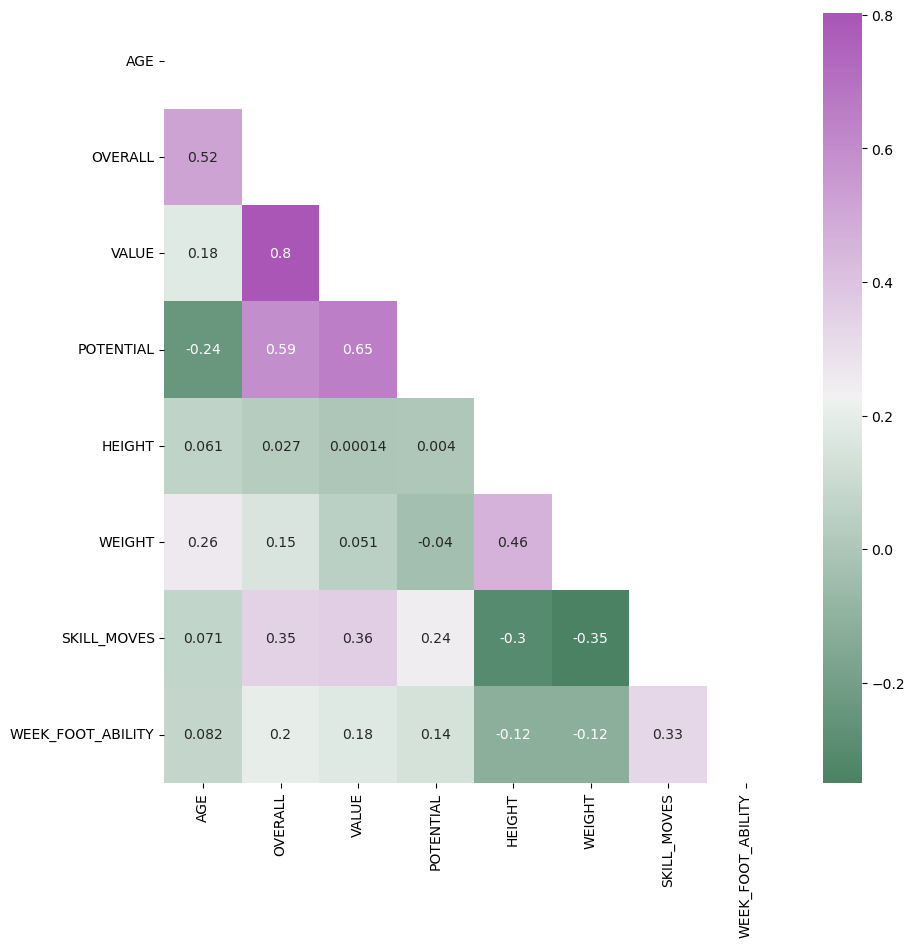

In [9]:
#Check correlation for each feature agaisnt each other
correlations_matrix = df_numeric_selected.corr()
#correlations_matrix[(correlations_matrix < 0.75) & (correlations_matrix > -0.75)] = 0
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 10))
colormap=sns.diverging_palette(145, 300, s=60, as_cmap=True)
#sns.set(rc={'figure.figsize':(20,15)})
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True, cmap=colormap)
plt.show()

Explanations for this graph: 
>We have selected variables with low correlation
>Please check if we need Growth is correlated with age. Not bigger than 0.9 it should be ok. 
>Value is our target

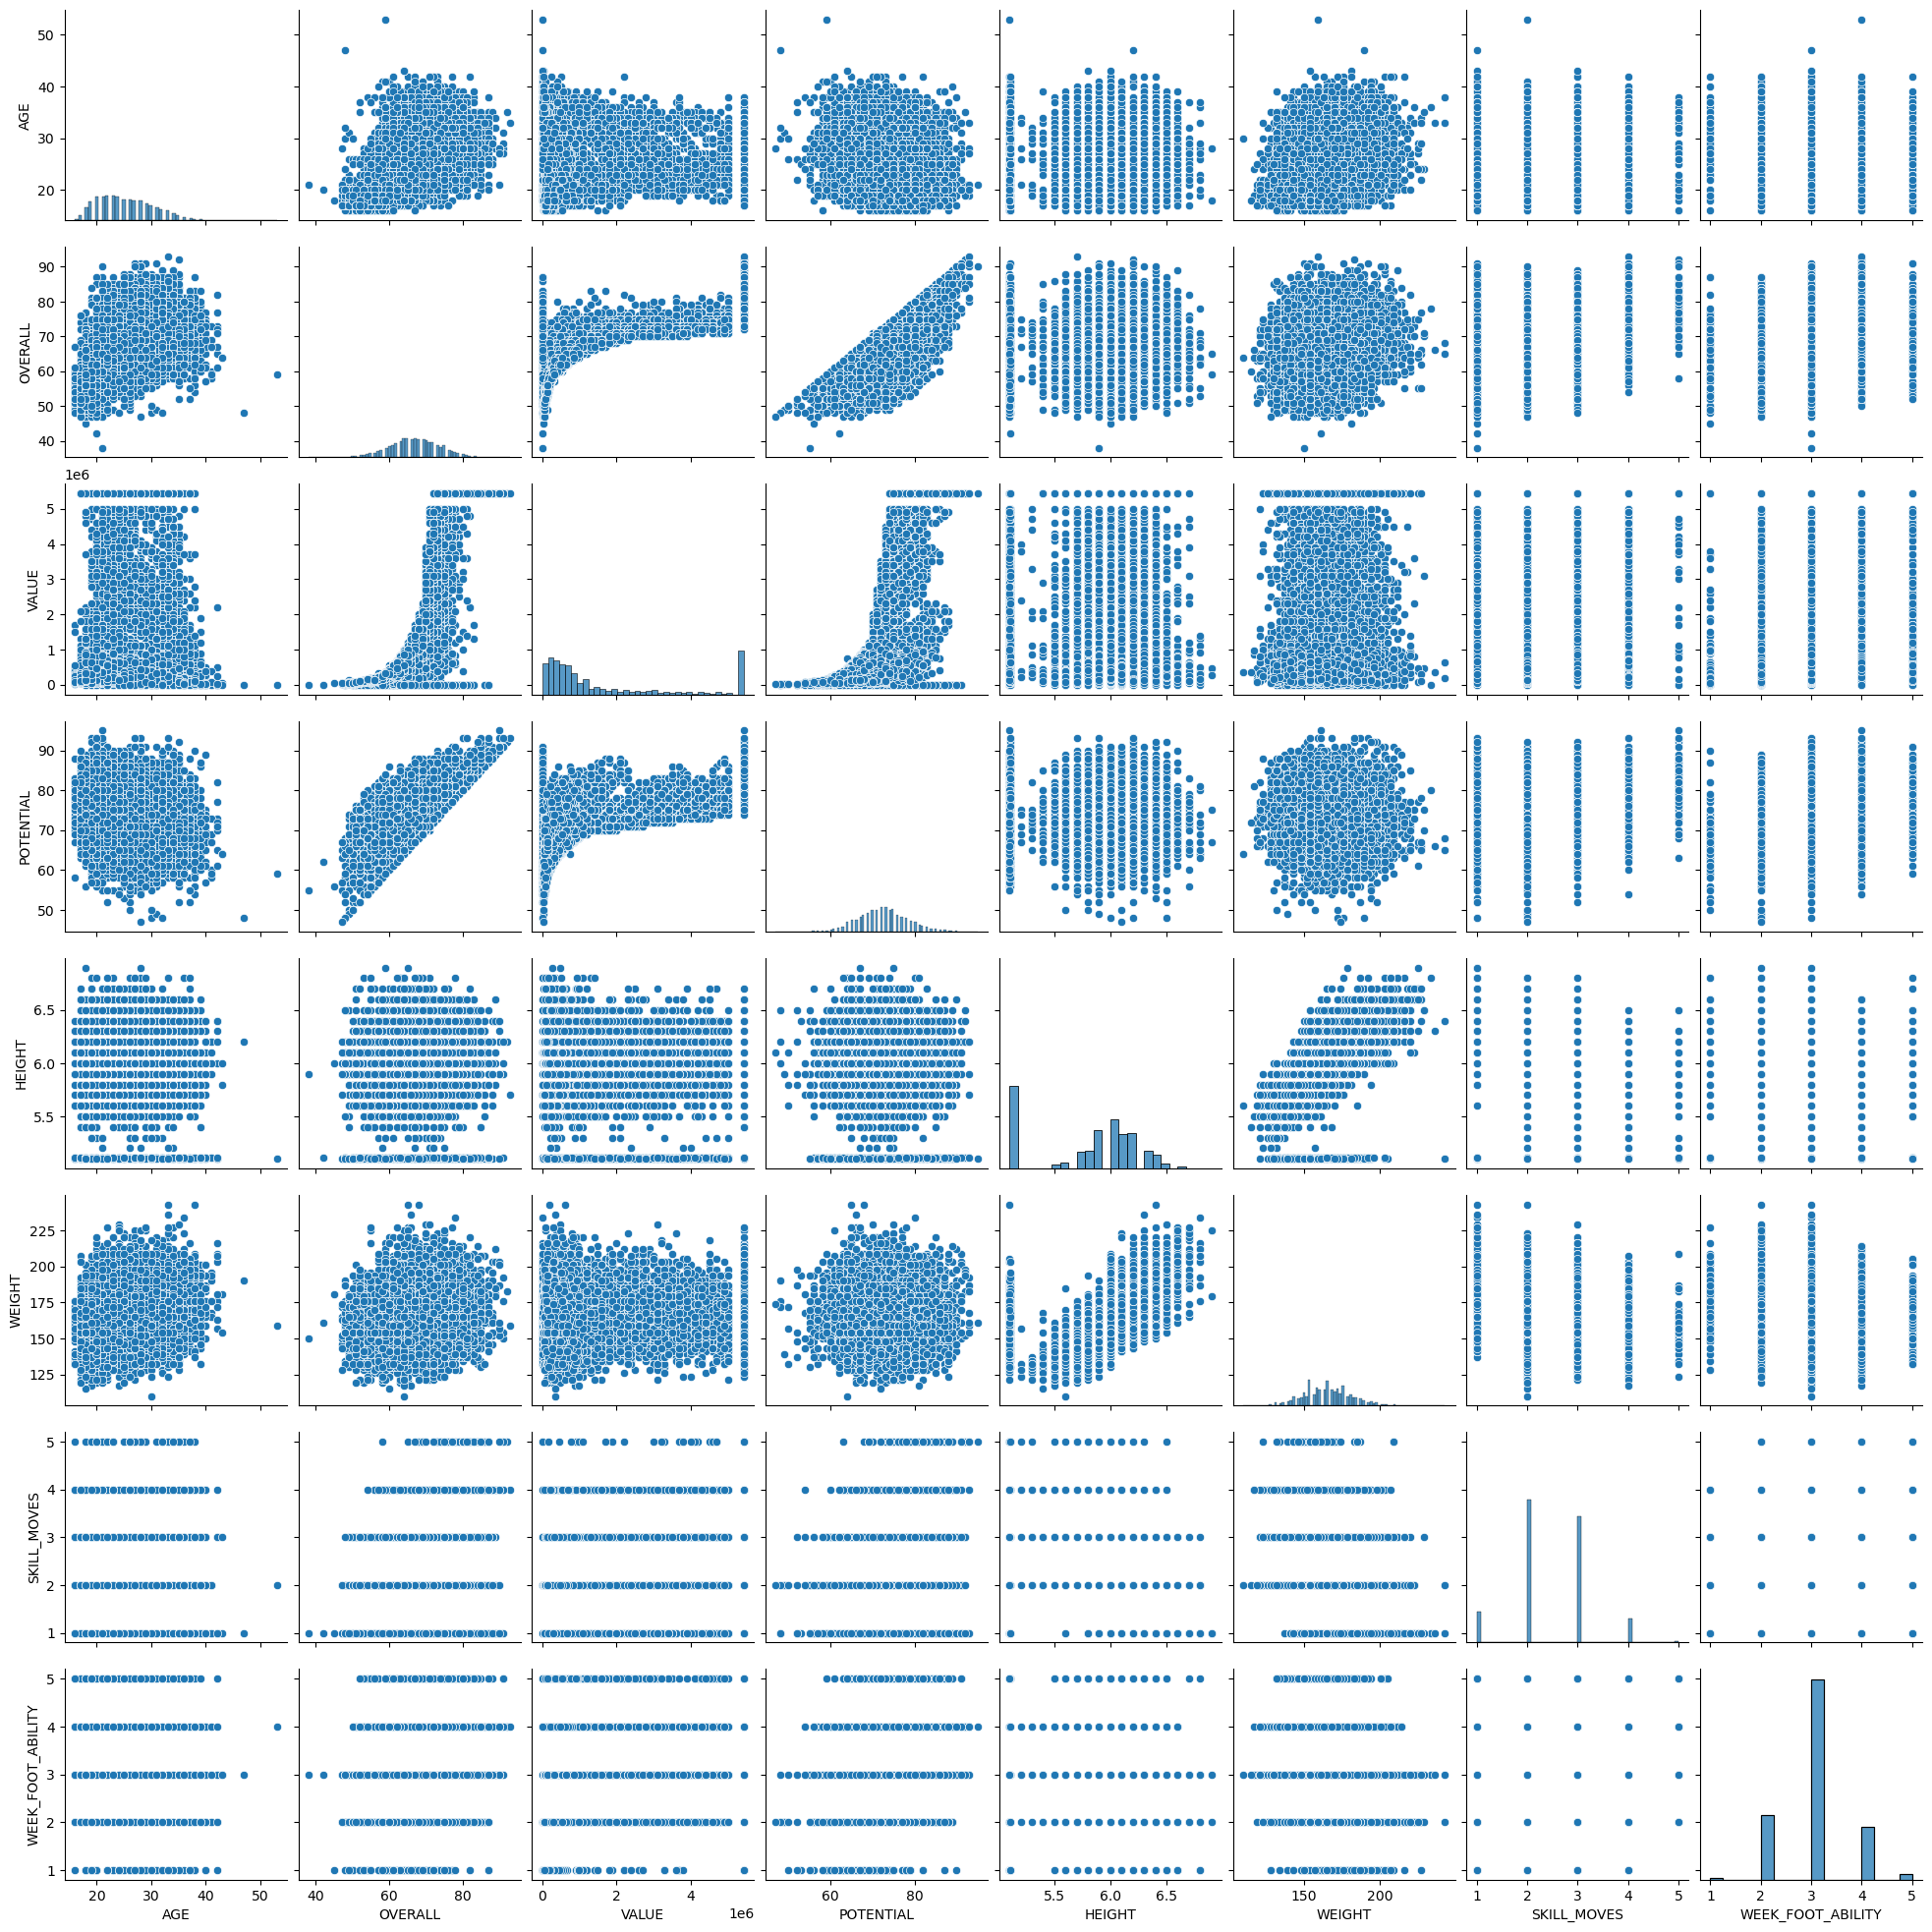

In [10]:
sns.pairplot(df_numeric_selected)

## 02.01 Encoding

We Encode the BEST_POSITION feature to keep the most relevant categories. In total they are four

In [11]:
# Create a dictionary that maps old categories to new categories
bp_mapping = {
    "GK": "GOAL KEEPER",
    "ST": "FORWARD",
    "CF": "FORWARD",
    "RW": "FORWARD",
    "LW": "FORWARD",
    "CAM": "MIDFIELD",
    "CM": "MIDFIELD",
    "RM": "MIDFIELD",
    "LM": "MIDFIELD",
    "CDM": "MIDFIELD",
    "CB": "DEFENSIVE",
    "LWB": "DEFENSIVE",
    "RWB": "DEFENSIVE",
    "LB": "DEFENSIVE",
    "RB": "DEFENSIVE",
}
# Use the replace() method to map old categories to new categories
df_object_selected["BEST_POSITION"] = df_object_selected["BEST_POSITION"].replace(bp_mapping)
#df_object_selected.head()
df_object_selected["BEST_POSITION"].unique()

array(['DEFENSIVE', 'MIDFIELD', 'FORWARD', 'GOAL KEEPER'], dtype=object)

In [12]:
df_object_encoded = pd.get_dummies(df_object_selected, drop_first=False)
df_object_encoded.sample(5)
print(df_object_encoded.shape)

(17125, 14)


## 02.02 Numericals normalization / transformation

<div class="alert alert-block alert-danger">
<b>Danger:</b> We separate first target and the rest of the variables. 
</div>

The distributions and the outliers for the selected variables are plotted here. This helps us to decide if we need a normalization or a standarization

In [13]:
#I split VALUEt and the rest of numerical values to apply the scalers
X_Target=df_numeric_selected['VALUE']
df_numeric_vars=df_numeric_selected.drop(columns='VALUE')
df_numeric_vars.sample(4)

AGE  OVERALL  POTENTIAL  HEIGHT  WEIGHT  SKILL_MOVES  WEEK_FOOT_ABILITY
14953   17       64         84     5.6     139          3.0                3.0
8567    23       73         79     6.1     181          3.0                3.0
9565    21       63         71     5.9     172          2.0                3.0
11526   27       70         73     6.4     203          2.0                3.0

In [14]:
print(X_Target.shape,df_numeric_vars.shape)

(17125,) (17125, 7)


In [15]:
#Range is set between 0 and 1 
#Min Max transformation
transformer = MinMaxScaler().fit(df_numeric_vars) 
x_minmax = transformer.transform(df_numeric_vars) #Array
df_numeric_vars_temp = pd.DataFrame(x_minmax,columns=df_numeric_vars.columns) ## Convert to dataframe


## Print the dristribution plots for the numerical values. 
#for column in df_numeric_vars_temp.columns:
#    sns.distplot(df_numeric_vars_temp[column])
#    plt.show()

In [16]:
#Show the distributions in as a normal distribution. 
##There are different methods to do this transformation
#I use with BOX-COX Transformation
df_numeric_vars_tranformed=df_numeric_vars_temp


for column in df_numeric_vars_tranformed.columns:
    df_numeric_vars_tranformed[column] = np.where(df_numeric_vars_tranformed[column]<=0, np.NAN, df_numeric_vars_tranformed[column]) # data['HV1'].mean()
    df_numeric_vars_tranformed[column] = df_numeric_vars_tranformed[column].fillna(df_numeric_vars_tranformed[column].mean())
    transformed_data, _ci = stats.boxcox(df_numeric_vars_tranformed[column])

In [17]:
df_numeric_vars_tranformed.shape

(17125, 7)

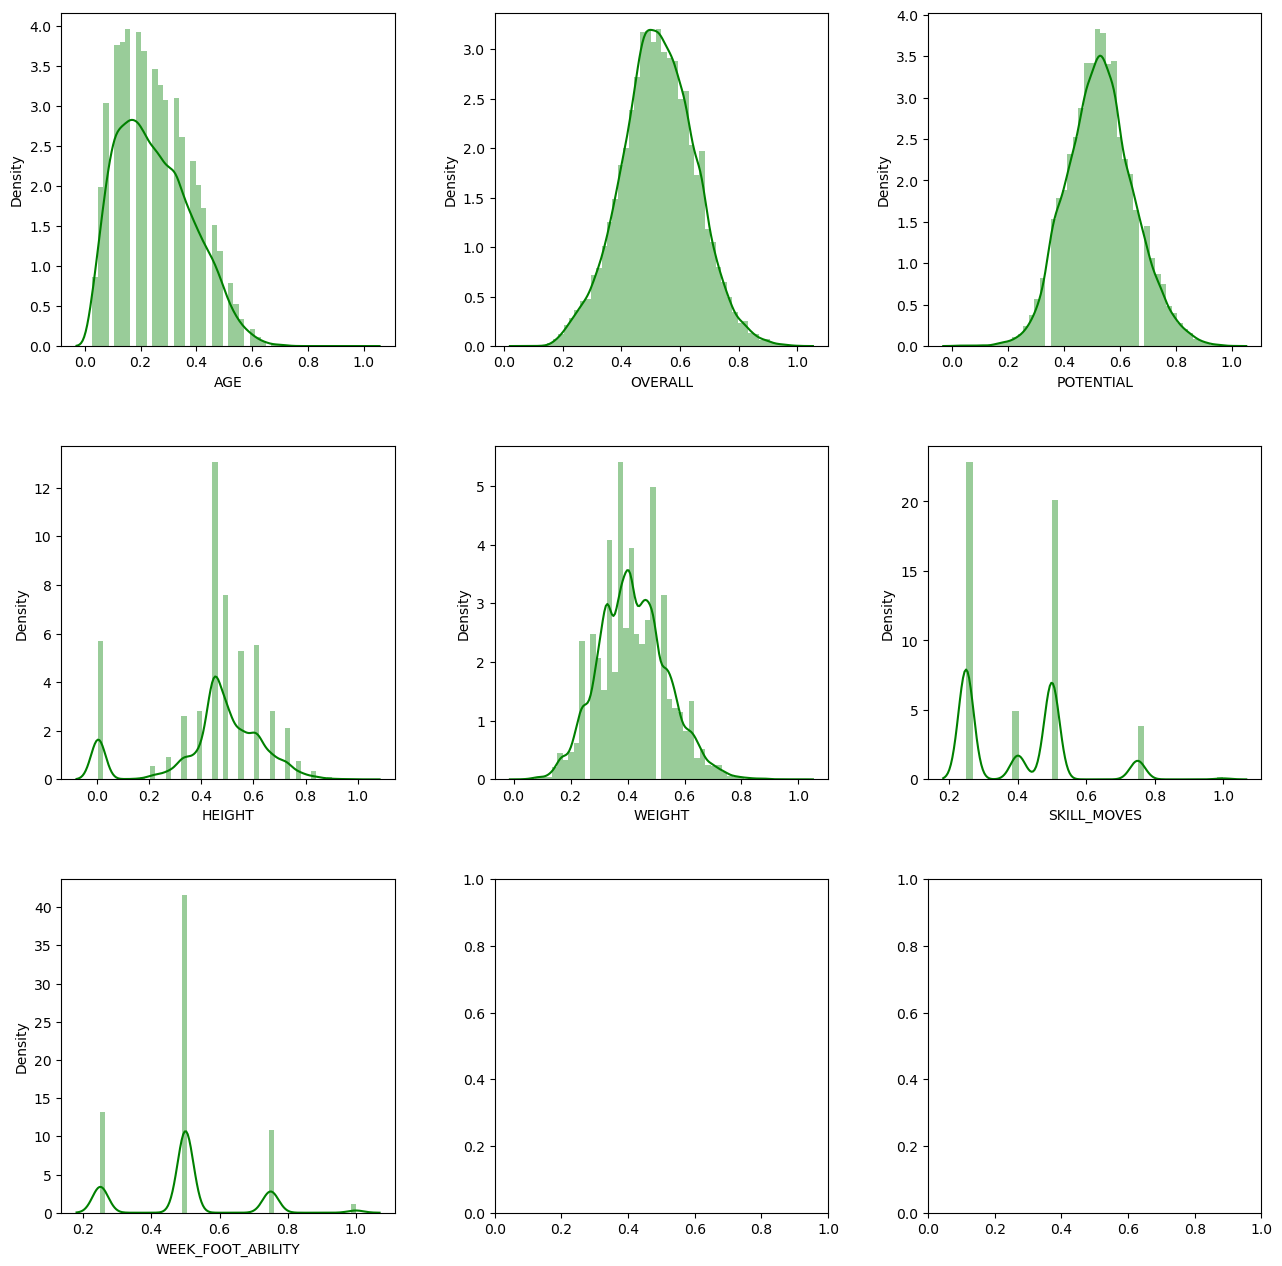

In [18]:
# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(df_numeric_vars_tranformed.columns) + num_cols - 1) // num_cols  # number of rows in the grid

# create the plot grid and plot each distribution in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, column in enumerate(df_numeric_vars_tranformed.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    sns.distplot(df_numeric_vars_tranformed[column], ax=axes[row_idx, col_idx], kde=True, color='green')
    axes[row_idx, col_idx].set_xlabel(column)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

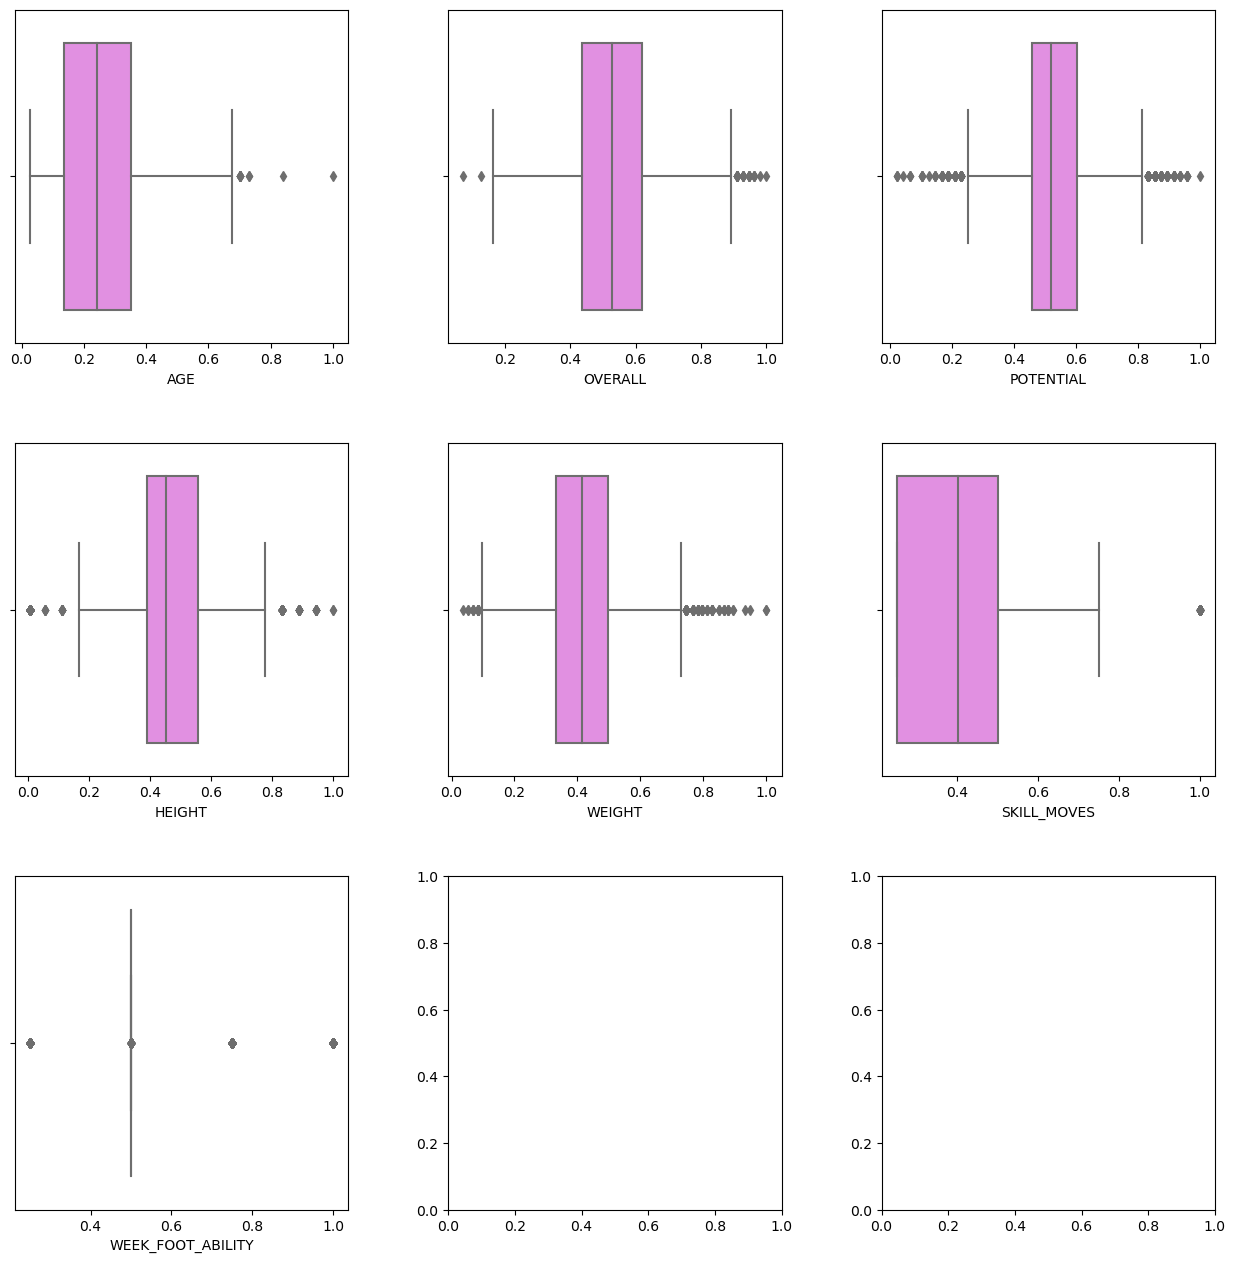

In [19]:
# determine the number of rows and columns in the plot grid
num_cols = 3  # number of columns in the grid
num_rows = (len(df_numeric_vars_tranformed.columns) + num_cols - 1) // num_cols  # number of rows in the grid

# create the plot grid and plot each distribution in a separate subplot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, column in enumerate(df_numeric_vars_tranformed.columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx]
    sns.boxplot(x=df_numeric_vars_tranformed[column], whis=1.5, ax=axes[row_idx, col_idx], color='violet')
    axes[row_idx, col_idx].set_xlabel(column)

# adjust the spacing between subplots and show the figure
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)
plt.show()

# 04 Train the model

>Finally we create the dataframe to test the model 

We have two dataframes:

    -Target or Y
    -Variables or X

In [20]:
Y=X_Target
#X=pd.concat([df_numeric_vars_tranformed, df_object_encoded], axis=1)
X = pd.concat([df_numeric_vars_tranformed.reset_index(drop=True), df_object_encoded.reset_index(drop=True)], axis=1)
X
#X.reset_index()
print(X.shape,Y.shape)

(17125, 21) (17125,)


In [21]:
#Separation between train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100) 
#Train model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# 05 Model Validations and Vizs

In [22]:
#Test model
predictions  = model.predict(X_test)
predictions.shape

(5138,)

In [23]:
# evaluating sklearn's LR model
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)

r2 =  0.718066036567175
RMSE =  963303.6874602643
MSE =  927953994274.5425


### Represent results

In [25]:
results = pd.DataFrame()
results['Real_values'] = y_test
results['pred'] = predictions
results['diff'] = results.apply(lambda x: abs(x['Real_values'] - x['pred']), axis=1)
results

Real_values          pred          diff
13390     900000.0  1.979571e+06  1.079571e+06
13655    1800000.0  2.483989e+06  6.839889e+05
5052      625000.0  1.089776e+06  4.647759e+05
10928     170000.0 -3.183632e+05  4.883632e+05
6154     5437500.0  5.702099e+06  2.645993e+05
...            ...           ...           ...
4445     5437500.0  3.643670e+06  1.793830e+06
3600     4200000.0  3.163688e+06  1.036312e+06
11569     600000.0  1.419402e+06  8.194018e+05
15874     975000.0  1.770066e+06  7.950665e+05
10910    1200000.0  1.985311e+06  7.853106e+05

[5138 rows x 3 columns]

In [26]:
results.sort_values('diff', ascending=False).head(50)

Real_values          pred          diff
277         3000.0 -5.486314e+06  5.489314e+06
8894           0.0  5.212081e+06  5.212081e+06
14714          0.0  4.605712e+06  4.605712e+06
13342          0.0  4.340949e+06  4.340949e+06
444            0.0  4.155380e+06  4.155380e+06
2197           0.0  4.124062e+06  4.124062e+06
3618           0.0  4.096614e+06  4.096614e+06
13340          0.0  3.890707e+06  3.890707e+06
7338           0.0  3.838363e+06  3.838363e+06
1426           0.0  3.806115e+06  3.806115e+06
11140          0.0  3.801904e+06  3.801904e+06
13337          0.0  3.715604e+06  3.715604e+06
16045      25000.0 -3.576074e+06  3.601074e+06
6648           0.0  3.551485e+06  3.551485e+06
15595          0.0  3.535020e+06  3.535020e+06
632            0.0  3.526637e+06  3.526637e+06
218            0.0  3.475091e+06  3.475091e+06
4681           0.0  3.464939e+06  3.464939e+06
13421       5000.0 -3.436502e+06  3.441502e+06
2036           0.0  3.292484e+06  3.292484e+06
2206           0.0  3.267517e+06  3.267517e+06
13341          0.0  3.221617e+06  3.221617e+06
54             0.0  3.220067e+06  3.220067e+06
16151      30000.0 -3.158447e+06  3.188447e+06
16873      25000.0 -3.159827e+06  3.184827e+06
15057      45000.0 -3.017962e+06  3.062962e+06
7796           0.0  3.061534e+06  3.061534e+06
13929      40000.0 -2.998341e+06  3.038341e+06
13352          0.0  3.036496e+06  3.036496e+06
729        20000.0 -3.012196e+06  3.032196e+06
11967          0.0  2.986515e+06  2.986515e+06
165        15000.0 -2.966487e+06  2.981487e+06
14715          0.0  2.951200e+06  2.951200e+06
8433       35000.0 -2.874821e+06  2.909821e+06
3222           0.0  2.863537e+06  2.863537e+06
73             0.0  2.851177e+06  2.851177e+06
8754           0.0  2.830776e+06  2.830776e+06
35             0.0  2.812569e+06  2.812569e+06
15             0.0 -2.754636e+06  2.754636e+06
5347           0.0  2.745135e+06  2.745135e+06
13930      30000.0 -2.694431e+06  2.724431e+06
74             0.0  2.716448e+06  2.716448e+06
16044      40000.0 -2.669499e+06  2.709499e+06
12303      25000.0 -2.667170e+06  2.692170e+06
10393      35000.0 -2.641137e+06  2.676137e+06
129       650000.0  3.321232e+06  2.671232e+06
4951           0.0  2.632313e+06  2.632313e+06
31             0.0 -2.630500e+06  2.630500e+06
420      1700000.0  4.319385e+06  2.619385e+06
4858           0.0  2.616623e+06  2.616623e+06

Text(0.5, 1.0, 'Regression Plot')

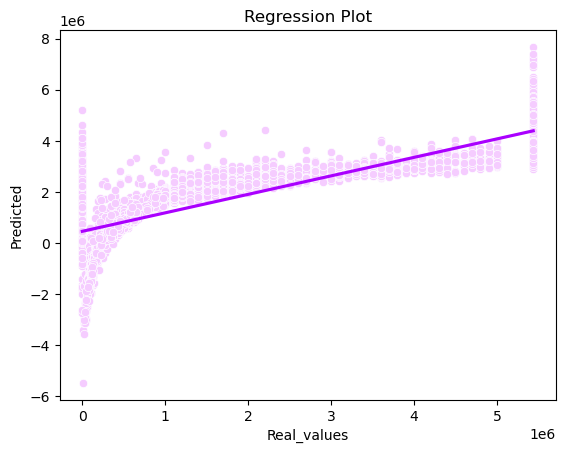

In [39]:
#sns.regplot(results['true'], results['pred'])

# plot scatter plot with different colors for 'true' and 'pred'
sns.scatterplot(x='Real_values', y='pred', data=results, color='#f5ccff')

# plot regression line with single color
sns.regplot(x='Real_values', y='pred', data=results, scatter=False, color='#AA00FF')

plt.xlabel('Real_values')
plt.ylabel('Predicted')
plt.title('Regression Plot')